In [1]:
from io import StringIO

In [2]:
!pip install pandas_datareader

    100% |████████████████████████████████| 94kB 2.0MB/s ta 0:00:01
    100% |████████████████████████████████| 4.6MB 85kB/s  eta 0:00:01
    100% |████████████████████████████████| 5.2MB 67kB/s eta 0:00:011
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 20, in <module>
      File "/private/var/folders/m7/nv6g6b6x4v5989tvdczry75c0000gn/T/pip-build-dg9ZqA/pandas/setup.py", line 349
        f"{extension}-source file '{sourcefile}' not found.\n"
                                                             ^
    SyntaxError: invalid syntax
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /private/var/folders/m7/nv6g6b6x4v5989tvdczry75c0000gn/T/pip-build-dg9ZqA/pandas
You are using pip version 7.1.2, however version 20.2.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install selenium

  Using cached https://files.pythonhosted.org/packages/80/d6/4294f0b4bce4de0abf13e17190289f9d0613b0a44e5dd6a7f5ca98459853/selenium-3.141.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/9f/f0/a391d1463ebb1b233795cabfc0ef38d3db4442339de68f847026199e69d7/urllib3-1.25.10-py2.py3-none-any.whl
Exception:
Traceback (most recent call last):
  File "/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg/pip/basecommand.py", line 211, in main
    status = self.run(options, args)
  File "/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg/pip/commands/install.py", line 311, in run
    root=options.root_path,
  File "/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg/pip/req/req_set.py", line 646, in install
    **kwargs
  File "/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg/pip/req/req_install.py", line 803, in install
    self.move_wheel_files(self.source_dir, root=root)
  File "/Library/Python/2.7/site-packages/pip-7.1.2-py2.7.egg/pip/req/req_install.py"

In [4]:
!pip install BeautifulSoup4

In [11]:
import numpy as np
import pandas as pd
#import pandas_datareader
import datetime
#import pandas_datareader.data as web
import matplotlib.pyplot as plt
%matplotlib inline
import selenium

In [12]:
from selenium import webdriver
from bs4 import BeautifulSoup

In [13]:
#1 vamos importar as informações das ações de 3 empresas Locadoras: Localiza, Movida e Unidas
start= datetime.datetime(2014,1,1)
end= datetime.datetime(2020,1,1)

In [14]:
localiza= web.DataReader("RENT3.SA", 'yahoo', start, end)

NameError: name 'web' is not defined

In [5]:
localiza.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,10.12850,9.83522,10.10430,9.90174,5147131.0,7.572349
2014-01-03,10.10430,9.89267,9.89267,10.09830,5378325.0,7.722667
2014-01-06,10.12850,9.84732,10.08010,9.88964,4918583.0,7.563096
2014-01-07,10.00760,9.79592,9.96825,9.82313,2836181.0,7.512234
2014-01-08,9.94709,9.66893,9.80196,9.85639,2890755.0,7.537666


In [6]:
movida = web.DataReader("MOVI3.SA", 'yahoo', start, end)
unidas = web.DataReader("LCAM3.SA", 'yahoo', start, end)

In [7]:
movida.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-24,9.05270,8.41951,8.46898,8.97355,1892221.0,8.341428
2017-05-25,9.38909,8.85483,8.98345,9.00323,993464.0,8.369018
2017-05-26,9.25057,8.78557,9.00323,8.82515,2187056.0,8.203481
2017-05-29,8.82515,8.82515,8.82515,8.82515,0.0,8.203481
2017-05-30,9.33962,9.07249,9.15164,9.15164,937266.0,8.506971


In [8]:
unidas.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,2.33333,2.23333,2.27000,2.33333,105600.0,0.975933
2014-01-03,2.32333,2.27333,2.27333,2.27333,29400.0,0.950837
2014-01-06,2.33333,2.17000,2.33333,2.17333,206100.0,0.909012
2014-01-07,2.23333,2.18667,2.20667,2.20000,51600.0,0.920167
2014-01-08,2.20000,2.16333,2.20000,2.17000,288600.0,0.907619


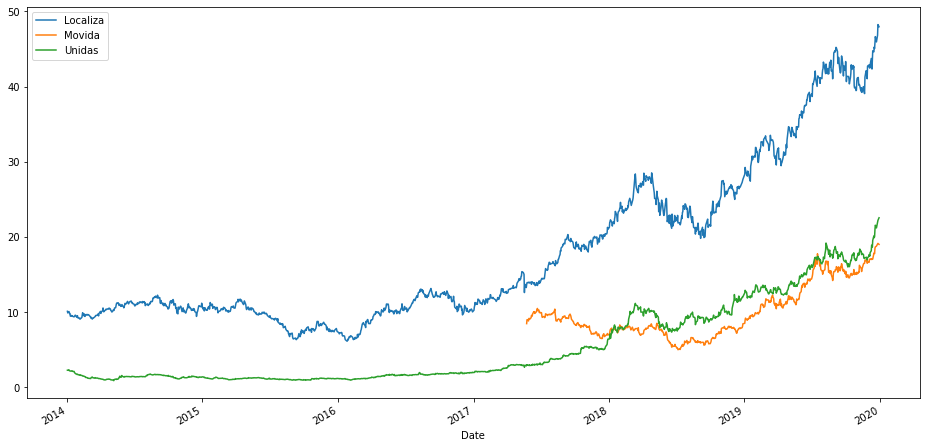

In [11]:
# agora vamos analisar os preços 'Open'de todas elas:
localiza['Open'].plot(label= 'Localiza', figsize=(16,8))
movida['Open'].plot(label= 'Movida')
unidas['Open'].plot(label= 'Unidas')
plt.legend()

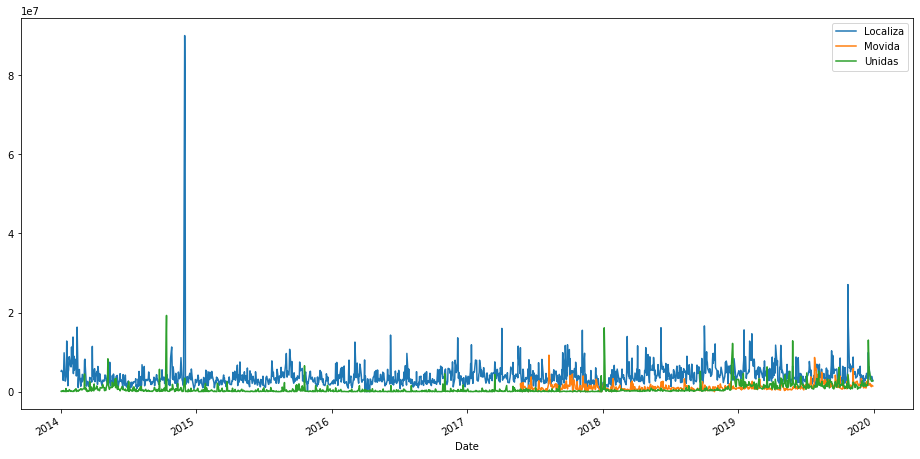

In [12]:
# agora vamos plotar o volume de ações tradado por dia de cada uma:
localiza['Volume'].plot(label= 'Localiza', figsize= (16,8))
movida['Volume'].plot(label='Movida')
unidas['Volume'].plot(label= 'Unidas')
plt.legend()

In [13]:
localiza['Volume'].argmax()

228

In [15]:
# agora vamos tentar plotar um gráfico dos custos de captação (bolha) de cada empresa, para enxergar quem capta mais barato.
driver= webdriver.Chrome(executable_path='./chromedriver')
driver.get("https://ri.localiza.com/mercado-de-capitais/dividas")

In [16]:
table = driver.find_element_by_tag_name('table')

In [17]:
table.screenshot('tt.png')

True

In [18]:
body = table.find_element_by_tag_name('tbody')

In [19]:
body

<selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="65ddd429-45c5-4f3a-8f57-54c9e426b46a")>

In [20]:
rows = body.find_elements_by_tag_name('tr')

In [21]:
rows

[<selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="a1397d20-23fd-4fff-83ae-dae1dd16572b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="a5adc565-ed1c-433c-b719-540f1519d318")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="59ede0cb-043f-474a-896f-a843e9a7cb3b")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="f58e39f9-7979-4733-8164-24d049eec54a")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="7f6af457-ebe8-4a75-8e81-40cda78dcee7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="4a7dc642-2a8f-4247-87f3-c636bc8c1ab8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="e5941dab-d3f5-40fb-8b91-7b

In [22]:
lista = []

for row in rows:
    
    try:
        cells = row.find_elements_by_tag_name('td')
        name = cells[0].get_attribute('innerHTML')
        amount = cells[2].get_attribute('innerHTML')
        rate= cells[3].get_attribute('innerHTML')
        date= cells[4].get_attribute('innerHTML')
        
        d= {'name': name, 'amount': amount, 'rate': rate, 'date': date}
        lista.append(d)
        
    except:
        print('error')
    
    
    

error
error


In [23]:
df = pd.DataFrame(lista)

In [24]:
df

,name,amount,rate,date
0,Localiza Rent a Car S.A.,"500,00","111,50% CDI",12/12/2016
1,Localiza Rent a Car S.A.,"700,00","107,25% CDI",15/05/2017
2,Localiza Rent a Car S.A.,"868,90","109,35% CDI",15/12/2017
3,Localiza Rent a Car S.A.,"216,10","111,30% CDI",15/12/2017
4,Localiza Rent a Car S.A.,"200,00","107,90% CDI",18/09/2018
5,Localiza Rent a Car S.A.,"800,00","112,32% CDI",18/09/2018
6,Localiza Rent a Car S.A.,"1.000,00","107,25% CDI",15/04/2019
7,Localiza Rent a Car S.A.,"1.000,00","CDI + 1,05%",29/11/2019
8,Localiza Fleet S.A.,"300,00","112,00% CDI",18/07/2018
9,Localiza Fleet S.A.,"400,00","110,40% CDI",21/12/2018


In [25]:
driver.get("https://ri.unidas.com.br/acoes-e-debentures/debentures-e-notas-promissorias/")

In [26]:
table = driver.find_element_by_tag_name('table')

In [27]:
table

<selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="58e21bee-6934-4806-ac6d-3bb373242286")>

In [28]:
body = table.find_element_by_tag_name('tbody')

In [29]:
body

<selenium.webdriver.remote.webelement.WebElement (session="3b75ec71293b44fcfd4cf473e51f8607", element="dd60a98b-501f-4d93-9825-83c2d7a20d8d")>

In [30]:
rows = body.find_elements_by_tag_name('tr')

In [31]:
lista_unidas = []

for row in rows:
    
    try:
        cells = row.find_elements_by_tag_name('td')
        name = cells[0].find_element_by_tag_name('span').get_attribute('innerHTML')
        amount = cells[2].find_element_by_tag_name('span').get_attribute('innerHTML')
        rate= cells[3].find_element_by_tag_name('span').get_attribute('innerHTML')
        date= cells[5].find_element_by_tag_name('span').get_attribute('innerHTML')
        
        d= {'name': name, 'amount': amount, 'rate': rate, 'date': date}
        lista_unidas.append(d)
        
    except:
        print('error')

In [32]:
df_unidas= pd.DataFrame(lista_unidas[1:])

In [33]:
df_unidas

,name,amount,rate,date
0,Unidas,"100,0","CDI + 1,75%",29/10/2013
1,Unidas,"150,0","CDI + 2,20%",23/06/2017
2,Unidas,"250,0","CDI + 1,40%",28/08/2017
3,Unidas,"100,0","CDI + 1,20%",17/11/2017
4,Unidas,"411,4","CDI + 1,40%",19/02/2018
5,Unidas,"350,0",119% do CDI,27/04/2018
6,Unidas,"400,0",113% do CDI,27/09/2018
7,Unidas<br>\n(Cia. de Locação das Américas),200.0,108% do CDI,20/09/2019
8,Unidas,"150,0","CDI + 1,40%",29/11/2017
9,Auto Ricci,"300,0","CDI + 2,10%",22/06/2017


In [34]:
df_unidas.iloc[7]['name'] = 'Unidas'

In [35]:
df_unidas['amount'] = pd.to_numeric(df_unidas['amount'].apply(lambda x: x.replace('.', '').replace(',', '.')))

In [36]:
df_unidas['date'] = pd.to_datetime(df_unidas['date'], format="%d/%m/%Y")

In [37]:
df_unidas

,name,amount,rate,date
0,Unidas,100.0,"CDI + 1,75%",2013-10-29
1,Unidas,150.0,"CDI + 2,20%",2017-06-23
2,Unidas,250.0,"CDI + 1,40%",2017-08-28
3,Unidas,100.0,"CDI + 1,20%",2017-11-17
4,Unidas,411.4,"CDI + 1,40%",2018-02-19
5,Unidas,350.0,119% do CDI,2018-04-27
6,Unidas,400.0,113% do CDI,2018-09-27
7,Unidas,2000.0,108% do CDI,2019-09-20
8,Unidas,150.0,"CDI + 1,40%",2017-11-29
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22


In [38]:
'108% do CDI'.split(' ')[0][:-1].replace('.','').replace(',','.')

'108'

In [39]:
'CDI + 1,20%'.split(' ')[-1][:-1].replace('.','').replace(',','.')

'1.20'

In [40]:
def parse_cdi(value):
    if value.startswith('CDI'):
        return value.split(' ')[-1][:-1].replace('.','').replace(',','.')
    else:
        return value.split(' ')[0][:-1].replace('.','').replace(',','.')
    

In [41]:
df_unidas['true_rate'] = df_unidas['rate'].apply(parse_cdi)

In [42]:
df_unidas

,name,amount,rate,date,true_rate
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40
5,Unidas,350.0,119% do CDI,2018-04-27,119
6,Unidas,400.0,113% do CDI,2018-09-27,113
7,Unidas,2000.0,108% do CDI,2019-09-20,108
8,Unidas,150.0,"CDI + 1,40%",2017-11-29,1.40
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22,2.10


In [43]:
cdi = pd.read_csv('taxa_selic_apurada.csv', ';', header= 1)

In [44]:
cdi= cdi.dropna(axis=1)

In [45]:
cdi

,Data,Taxa (% a.a.),Fator diário,Financeiro (R$),Operações,Média,Mediana,Moda,Desvio padrão,Índice de curtose
0,20/05/2020,"2,9","1,00011345","797.609.833.052,45",935,"2,9","2,89","2,9","0,02","493,099"
1,19/05/2020,"2,9","1,00011345","786.622.171.085,08",956,"2,9","2,89","2,9","0,018","562,331"
2,18/05/2020,"2,9","1,00011345","788.953.337.732,54",926,"2,9","2,89","2,9","0,017","599,4"
3,15/05/2020,"2,9","1,00011345","793.484.776.829,85",938,"2,9","2,89","2,9","0,02","503,904"
4,14/05/2020,"2,9","1,00011345","788.590.595.939,14",943,"2,9","2,89","2,9","0,018","544,47"
...,...,...,...,...,...,...,...,...,...,...
2501,07/06/2010,"9,4","1,00035657",0,0,0,0,0,0,0
2502,04/06/2010,"9,4","1,00035657",0,0,0,0,0,0,0
2503,02/06/2010,"9,4","1,00035657",0,0,0,0,0,0,0
2504,01/06/2010,"9,4","1,00035657",0,0,0,0,0,0,0


In [46]:
cdi['Data']= pd.to_datetime(cdi['Data'], format= "%d/%m/%Y")

In [47]:
cdi['Taxa (% a.a.)'] = pd.to_numeric(cdi['Taxa (% a.a.)'].apply(lambda x: x.replace(',', '.')))

In [48]:
cdi

,Data,Taxa (% a.a.),Fator diário,Financeiro (R$),Operações,Média,Mediana,Moda,Desvio padrão,Índice de curtose
0,2020-05-20,2.90,"1,00011345","797.609.833.052,45",935,"2,9","2,89","2,9","0,02","493,099"
1,2020-05-19,2.90,"1,00011345","786.622.171.085,08",956,"2,9","2,89","2,9","0,018","562,331"
2,2020-05-18,2.90,"1,00011345","788.953.337.732,54",926,"2,9","2,89","2,9","0,017","599,4"
3,2020-05-15,2.90,"1,00011345","793.484.776.829,85",938,"2,9","2,89","2,9","0,02","503,904"
4,2020-05-14,2.90,"1,00011345","788.590.595.939,14",943,"2,9","2,89","2,9","0,018","544,47"
...,...,...,...,...,...,...,...,...,...,...
2501,2010-06-07,9.40,"1,00035657",0,0,0,0,0,0,0
2502,2010-06-04,9.40,"1,00035657",0,0,0,0,0,0,0
2503,2010-06-02,9.40,"1,00035657",0,0,0,0,0,0,0
2504,2010-06-01,9.40,"1,00035657",0,0,0,0,0,0,0


In [49]:
df['date']= pd.to_datetime(df['date'],format="%d/%m/%Y" )

In [50]:
df_unidas

,name,amount,rate,date,true_rate
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40
5,Unidas,350.0,119% do CDI,2018-04-27,119
6,Unidas,400.0,113% do CDI,2018-09-27,113
7,Unidas,2000.0,108% do CDI,2019-09-20,108
8,Unidas,150.0,"CDI + 1,40%",2017-11-29,1.40
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22,2.10


In [52]:
df_unidas

,name,amount,rate,date,true_rate
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40
5,Unidas,350.0,119% do CDI,2018-04-27,119
6,Unidas,400.0,113% do CDI,2018-09-27,113
7,Unidas,2000.0,108% do CDI,2019-09-20,108
8,Unidas,150.0,"CDI + 1,40%",2017-11-29,1.40
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22,2.10


In [53]:
cdi

,Data,Taxa (% a.a.),Fator diário,Financeiro (R$),Operações,Média,Mediana,Moda,Desvio padrão,Índice de curtose
0,2020-05-20,2.90,"1,00011345","797.609.833.052,45",935,"2,9","2,89","2,9","0,02","493,099"
1,2020-05-19,2.90,"1,00011345","786.622.171.085,08",956,"2,9","2,89","2,9","0,018","562,331"
2,2020-05-18,2.90,"1,00011345","788.953.337.732,54",926,"2,9","2,89","2,9","0,017","599,4"
3,2020-05-15,2.90,"1,00011345","793.484.776.829,85",938,"2,9","2,89","2,9","0,02","503,904"
4,2020-05-14,2.90,"1,00011345","788.590.595.939,14",943,"2,9","2,89","2,9","0,018","544,47"
...,...,...,...,...,...,...,...,...,...,...
2501,2010-06-07,9.40,"1,00035657",0,0,0,0,0,0,0
2502,2010-06-04,9.40,"1,00035657",0,0,0,0,0,0,0
2503,2010-06-02,9.40,"1,00035657",0,0,0,0,0,0,0
2504,2010-06-01,9.40,"1,00035657",0,0,0,0,0,0,0


In [54]:
df_unidas_cdi = (
    pd.merge(df_unidas, cdi, left_on= 'date', right_on= 'Data')
    .drop(['Data', 'Financeiro (R$)', 'Operações','Média', 'Mediana','Moda','Desvio padrão','Índice de curtose'], axis=1)
    
)

In [55]:
def custo_div(rate, true_rate, taxa):
    
    if rate.startswith('CDI'):
        return (true_rate/100)+(taxa/100)
    else:
        return (true_rate/100)*(taxa/100)
    

In [56]:
def custo_div_row(row):
    
    if str(row['rate']).startswith('CDI'):
        return (float(row['true_rate'])/100)+(float(row['Taxa (% a.a.)'])/100)
    else:
        return (float(row['true_rate'])/100)*(float(row['Taxa (% a.a.)'])/100)
    

In [57]:
df_unidas_cdi.head()

,name,amount,rate,date,true_rate,Taxa (% a.a.),Fator diário
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75,9.40,"1,00035657"
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20,10.15,"1,00038370"
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40,9.15,"1,00034749"
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20,7.40,"1,00028333"
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40,6.65,"1,00025552"


In [58]:
custo_div('CDI + 1,75%',1.75, 9.40)

0.1115

In [59]:
df_unidas_cdi.apply(custo_div_row, axis=1)

0     0.111500
1     0.123500
2     0.105500
3     0.086000
4     0.080500
5     0.076160
6     0.072320
7     0.058320
8     0.088000
9     0.122500
10    0.171500
11    0.148500
12    0.093500
13    0.075200
14    0.069056
15    0.053753
16    0.143500
dtype: float64

In [60]:
df_unidas_cdi['custo_div'] = df_unidas_cdi.apply(
    lambda x: custo_div(
        str(x['rate']), 
        float(x['true_rate']), 
        float(x['Taxa (% a.a.)'])
    ), axis=1)

In [61]:
df_unidas_cdi['custo_div_2'] = df_unidas_cdi['custo_div']*100

In [62]:
df_unidas_cdi

,name,amount,rate,date,true_rate,Taxa (% a.a.),Fator diário,custo_div,custo_div_2
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75,9.40,"1,00035657",0.111500,11.1500
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20,10.15,"1,00038370",0.123500,12.3500
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40,9.15,"1,00034749",0.105500,10.5500
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20,7.40,"1,00028333",0.086000,8.6000
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40,6.65,"1,00025552",0.080500,8.0500
5,Unidas,350.0,119% do CDI,2018-04-27,119,6.40,"1,00024620",0.076160,7.6160
6,Unidas,400.0,113% do CDI,2018-09-27,113,6.40,"1,00024620",0.072320,7.2320
7,Unidas,2000.0,108% do CDI,2019-09-20,108,5.40,"1,00020872",0.058320,5.8320
8,Unidas,150.0,"CDI + 1,40%",2017-11-29,1.40,7.40,"1,00028333",0.088000,8.8000
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22,2.10,10.15,"1,00038370",0.122500,12.2500


In [63]:
df['amount'] = pd.to_numeric(df['amount'].apply(lambda x: x.replace('.','').replace(',', '.')))

In [64]:
df

,name,amount,rate,date
0,Localiza Rent a Car S.A.,500.0,"111,50% CDI",2016-12-12
1,Localiza Rent a Car S.A.,700.0,"107,25% CDI",2017-05-15
2,Localiza Rent a Car S.A.,868.9,"109,35% CDI",2017-12-15
3,Localiza Rent a Car S.A.,216.1,"111,30% CDI",2017-12-15
4,Localiza Rent a Car S.A.,200.0,"107,90% CDI",2018-09-18
5,Localiza Rent a Car S.A.,800.0,"112,32% CDI",2018-09-18
6,Localiza Rent a Car S.A.,1000.0,"107,25% CDI",2019-04-15
7,Localiza Rent a Car S.A.,1000.0,"CDI + 1,05%",2019-11-29
8,Localiza Fleet S.A.,300.0,"112,00% CDI",2018-07-18
9,Localiza Fleet S.A.,400.0,"110,40% CDI",2018-12-21


In [67]:
# agora vamos usar o merge para trazer as informações de cdi para o df da localiza:
df_localiza=(
    pd.merge(df, cdi, left_on= 'date', right_on= 'Data')
    .drop(['Data', 'Financeiro (R$)', 'Operações','Média','Mediana', 'Moda','Desvio padrão', 'Índice de curtose'], axis=1)
)

In [68]:
df_localiza

,name,amount,rate,date,Taxa (% a.a.),Fator diário
0,Localiza Rent a Car S.A.,500.0,"111,50% CDI",2016-12-12,13.65,"1,00050788"
1,Localiza Rent a Car S.A.,700.0,"107,25% CDI",2017-05-15,11.15,"1,00041957"
2,Localiza Rent a Car S.A.,868.9,"109,35% CDI",2017-12-15,6.90,"1,00026481"
3,Localiza Rent a Car S.A.,216.1,"111,30% CDI",2017-12-15,6.90,"1,00026481"
4,Localiza Rent a Car S.A.,200.0,"107,90% CDI",2018-09-18,6.40,"1,00024620"
5,Localiza Rent a Car S.A.,800.0,"112,32% CDI",2018-09-18,6.40,"1,00024620"
6,Localiza Rent a Car S.A.,1000.0,"107,25% CDI",2019-04-15,6.40,"1,00024620"
7,Localiza Rent a Car S.A.,1000.0,"CDI + 1,05%",2019-11-29,4.90,"1,00018985"
8,Localiza Fleet S.A.,300.0,"112,00% CDI",2018-07-18,6.40,"1,00024620"
9,Localiza Fleet S.A.,400.0,"110,40% CDI",2018-12-21,6.40,"1,00024620"


In [69]:
df_localiza['true_rate'] = df_localiza['rate'].apply(parse_cdi)

In [70]:
df_localiza['custo_div'] = df_localiza.apply(
    lambda x: custo_div(
        str(x['rate']), 
        float(x['true_rate']), 
        float(x['Taxa (% a.a.)'])
    ), axis=1)

In [71]:
df_localiza

,name,amount,rate,date,Taxa (% a.a.),Fator diário,true_rate,custo_div
0,Localiza Rent a Car S.A.,500.0,"111,50% CDI",2016-12-12,13.65,"1,00050788",111.50,0.152198
1,Localiza Rent a Car S.A.,700.0,"107,25% CDI",2017-05-15,11.15,"1,00041957",107.25,0.119584
2,Localiza Rent a Car S.A.,868.9,"109,35% CDI",2017-12-15,6.90,"1,00026481",109.35,0.075452
3,Localiza Rent a Car S.A.,216.1,"111,30% CDI",2017-12-15,6.90,"1,00026481",111.30,0.076797
4,Localiza Rent a Car S.A.,200.0,"107,90% CDI",2018-09-18,6.40,"1,00024620",107.90,0.069056
5,Localiza Rent a Car S.A.,800.0,"112,32% CDI",2018-09-18,6.40,"1,00024620",112.32,0.071885
6,Localiza Rent a Car S.A.,1000.0,"107,25% CDI",2019-04-15,6.40,"1,00024620",107.25,0.068640
7,Localiza Rent a Car S.A.,1000.0,"CDI + 1,05%",2019-11-29,4.90,"1,00018985",1.05,0.059500
8,Localiza Fleet S.A.,300.0,"112,00% CDI",2018-07-18,6.40,"1,00024620",112.00,0.071680
9,Localiza Fleet S.A.,400.0,"110,40% CDI",2018-12-21,6.40,"1,00024620",110.40,0.070656


In [72]:
df_localiza['custo_div_2'] = df_localiza['custo_div']*100

In [73]:
df_localiza

,name,amount,rate,date,Taxa (% a.a.),Fator diário,true_rate,custo_div,custo_div_2
0,Localiza Rent a Car S.A.,500.0,"111,50% CDI",2016-12-12,13.65,"1,00050788",111.50,0.152198,15.219750
1,Localiza Rent a Car S.A.,700.0,"107,25% CDI",2017-05-15,11.15,"1,00041957",107.25,0.119584,11.958375
2,Localiza Rent a Car S.A.,868.9,"109,35% CDI",2017-12-15,6.90,"1,00026481",109.35,0.075452,7.545150
3,Localiza Rent a Car S.A.,216.1,"111,30% CDI",2017-12-15,6.90,"1,00026481",111.30,0.076797,7.679700
4,Localiza Rent a Car S.A.,200.0,"107,90% CDI",2018-09-18,6.40,"1,00024620",107.90,0.069056,6.905600
5,Localiza Rent a Car S.A.,800.0,"112,32% CDI",2018-09-18,6.40,"1,00024620",112.32,0.071885,7.188480
6,Localiza Rent a Car S.A.,1000.0,"107,25% CDI",2019-04-15,6.40,"1,00024620",107.25,0.068640,6.864000
7,Localiza Rent a Car S.A.,1000.0,"CDI + 1,05%",2019-11-29,4.90,"1,00018985",1.05,0.059500,5.950000
8,Localiza Fleet S.A.,300.0,"112,00% CDI",2018-07-18,6.40,"1,00024620",112.00,0.071680,7.168000
9,Localiza Fleet S.A.,400.0,"110,40% CDI",2018-12-21,6.40,"1,00024620",110.40,0.070656,7.065600


In [197]:
df_locadoras = pd.DataFrame(df_unidas_cdi).append(df_localiza)

In [198]:
df_locadoras['adj_name'] = df_locadoras['name'].str.split(' ', ).apply(lambda x: x[0])

In [199]:
# agora que temos os dados das duas locadoras juntos, vamos tentar plotar o gráfico:
d = {
    'Localiza': 'green',
    'Unidas': 'blue',
    'Movida': 'orange'
}

In [200]:
adj_name

NameError: name 'adj_name' is not defined

TypeError: invalid type promotion

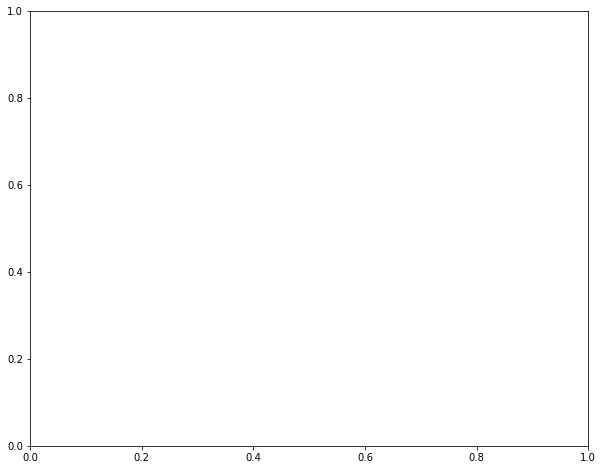

In [201]:
df_locadoras.plot(
    x='date',
    y='custo_div_2',
    alpha=0.4,
    figsize=(10,8), 
    kind='scatter'
#     s= df_locadoras['amount'] *2, 
#     c=df_locadoras['adj_name'].apply(lambda x: d.get(x, 'grey'))
)

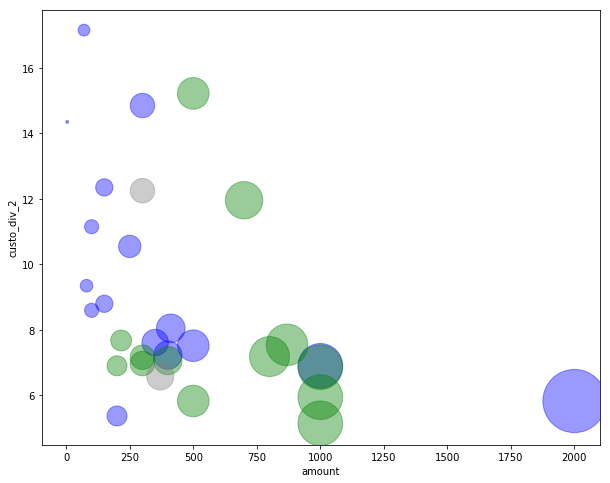

In [202]:
df_locadoras.plot.scatter(
    x='amount',
    y='custo_div_2',
    alpha=0.4,
    figsize=(10,8), 
    s= df_locadoras['amount'] *2, 
    c=df_locadoras['adj_name'].apply(lambda x: d.get(x, 'grey'))
)

In [203]:
# agora só faltam os dados da Movida:
driver.get("https://ri.movida.com.br/385949-2/")

In [204]:
table = driver.find_element_by_tag_name('table')

In [205]:
body = table.find_element_by_tag_name('tbody')

In [206]:
rows= body.find_elements_by_tag_name('tr')

In [207]:
data_movida = []

for row in rows:
    cells = row.find_elements_by_tag_name('td')
    if len(cells) >= 8:
        # linha cheia
        nome= cells[1].get_attribute('innerHTML')
        data_emissao = cells[2].get_attribute('innerHTML')
        volume = cells[6].get_attribute('innerHTML')
        taxa = cells[7].get_attribute('innerHTML')
        
        d = {'nome': nome , 'data_emissao': data_emissao, 'volume': volume, 'taxa': taxa}
    else: 
        # linha contém informaçoes da mesma emissão que a anterior
        nome = None
        data_emissao = None
        volume = cells[3].get_attribute('innerHTML')
        taxa = cells[4].get_attribute('innerHTML')
        
        d = {'nome': nome , 'data_emissao': data_emissao, 'volume': volume, 'taxa': taxa}
    data_movida.append(d)
        

In [208]:
movida = pd.DataFrame(data_movida)

In [209]:
movida = movida.fillna(method='ffill')

In [210]:
movida

,nome,data_emissao,volume,taxa
0,Movida Participações S.A.,15/07/2017,R$150 milhões,"1,55%"
1,Movida Participações S.A.,15/07/2017,R$250 milhões,"2,70%"
2,Movida Locação de Veículos S.A.,29/03/2018,R$250 milhões,"2,00%"
3,Movida Participações S.A.,07/06/2018,R$138 milhões,"1,60%"
4,Movida Participações S.A.,07/06/2018,R$181 milhões,"2,20%"
5,Movida Participações S.A.,07/06/2018,R$130 milhões,"1,90%"
6,Movida Locação de Veículos S.A.,10/10/2018,R$100 milhões,"1,80%"
7,Movida Participações S.A.,07/12/2018,R$214 milhões,"1,85%"
8,Movida Participações S.A.,07/12/2018,R$138 milhões,"2,05%"
9,Movida Participações S.A.,07/12/2018,R$247 milhões,"2,05%"


In [211]:
movida['data_emissao'] = pd.to_datetime(movida['data_emissao'], format= "%d/%m/%Y")

In [212]:
movida['volume'] = movida['volume'].str.extract('(\d{3})')

In [213]:
movida

,nome,data_emissao,volume,taxa
0,Movida Participações S.A.,2017-07-15,150,"1,55%"
1,Movida Participações S.A.,2017-07-15,250,"2,70%"
2,Movida Locação de Veículos S.A.,2018-03-29,250,"2,00%"
3,Movida Participações S.A.,2018-06-07,138,"1,60%"
4,Movida Participações S.A.,2018-06-07,181,"2,20%"
5,Movida Participações S.A.,2018-06-07,130,"1,90%"
6,Movida Locação de Veículos S.A.,2018-10-10,100,"1,80%"
7,Movida Participações S.A.,2018-12-07,214,"1,85%"
8,Movida Participações S.A.,2018-12-07,138,"2,05%"
9,Movida Participações S.A.,2018-12-07,247,"2,05%"


In [214]:
movida['taxa'] = pd.to_numeric(movida['taxa'].str.replace(',','.').str.replace('%',''))/100

In [215]:
movida

,nome,data_emissao,volume,taxa
0,Movida Participações S.A.,2017-07-15,150,0.0155
1,Movida Participações S.A.,2017-07-15,250,0.0270
2,Movida Locação de Veículos S.A.,2018-03-29,250,0.0200
3,Movida Participações S.A.,2018-06-07,138,0.0160
4,Movida Participações S.A.,2018-06-07,181,0.0220
5,Movida Participações S.A.,2018-06-07,130,0.0190
6,Movida Locação de Veículos S.A.,2018-10-10,100,0.0180
7,Movida Participações S.A.,2018-12-07,214,0.0185
8,Movida Participações S.A.,2018-12-07,138,0.0205
9,Movida Participações S.A.,2018-12-07,247,0.0205


In [216]:
cdi['Data'].dt.weekday.max()

4

In [217]:
cdi[cdi['Data'] == '2017-07-17']

,Data,Taxa (% a.a.),Fator diário,Financeiro (R$),Operações,Média,Mediana,Moda,Desvio padrão,Índice de curtose
712,2017-07-17,10.15,"1,00038370","432.491.435.323,01",894,"10,15","10,14","10,15","0,02","2.839,873"


In [218]:
movida_cdii = pd.merge_asof(left=movida,right=cdi.sort_values('Data'), 
#               how='left',
              left_on='data_emissao', right_on= 'Data').drop(['Data', 'Financeiro (R$)','Operações', 'Média', 'Mediana', 'Moda', 'Desvio padrão','Índice de curtose'], axis=1)

In [219]:
movida_cdii

,nome,data_emissao,volume,taxa,Taxa (% a.a.),Fator diário
0,Movida Participações S.A.,2017-07-15,150,0.0155,10.15,"1,00038370"
1,Movida Participações S.A.,2017-07-15,250,0.0270,10.15,"1,00038370"
2,Movida Locação de Veículos S.A.,2018-03-29,250,0.0200,6.40,"1,00024620"
3,Movida Participações S.A.,2018-06-07,138,0.0160,6.40,"1,00024620"
4,Movida Participações S.A.,2018-06-07,181,0.0220,6.40,"1,00024620"
5,Movida Participações S.A.,2018-06-07,130,0.0190,6.40,"1,00024620"
6,Movida Locação de Veículos S.A.,2018-10-10,100,0.0180,6.40,"1,00024620"
7,Movida Participações S.A.,2018-12-07,214,0.0185,6.40,"1,00024620"
8,Movida Participações S.A.,2018-12-07,138,0.0205,6.40,"1,00024620"
9,Movida Participações S.A.,2018-12-07,247,0.0205,6.40,"1,00024620"


In [220]:
movida_cdii['taxa'] = movida_cdii['taxa']*100

In [221]:
movida_cdii['custo_div_2'] = movida_cdii['Taxa (% a.a.)']+movida_cdii['taxa']

In [222]:
movida_cdii

,nome,data_emissao,volume,taxa,Taxa (% a.a.),Fator diário,custo_div_2
0,Movida Participações S.A.,2017-07-15,150,1.55,10.15,"1,00038370",11.70
1,Movida Participações S.A.,2017-07-15,250,2.70,10.15,"1,00038370",12.85
2,Movida Locação de Veículos S.A.,2018-03-29,250,2.00,6.40,"1,00024620",8.40
3,Movida Participações S.A.,2018-06-07,138,1.60,6.40,"1,00024620",8.00
4,Movida Participações S.A.,2018-06-07,181,2.20,6.40,"1,00024620",8.60
5,Movida Participações S.A.,2018-06-07,130,1.90,6.40,"1,00024620",8.30
6,Movida Locação de Veículos S.A.,2018-10-10,100,1.80,6.40,"1,00024620",8.20
7,Movida Participações S.A.,2018-12-07,214,1.85,6.40,"1,00024620",8.25
8,Movida Participações S.A.,2018-12-07,138,2.05,6.40,"1,00024620",8.45
9,Movida Participações S.A.,2018-12-07,247,2.05,6.40,"1,00024620",8.45


In [223]:
df_locadoras

,name,amount,rate,date,true_rate,Taxa (% a.a.),Fator diário,custo_div,custo_div_2,adj_name
0,Unidas,100.0,"CDI + 1,75%",2013-10-29,1.75,9.40,"1,00035657",0.111500,11.150000,Unidas
1,Unidas,150.0,"CDI + 2,20%",2017-06-23,2.20,10.15,"1,00038370",0.123500,12.350000,Unidas
2,Unidas,250.0,"CDI + 1,40%",2017-08-28,1.40,9.15,"1,00034749",0.105500,10.550000,Unidas
3,Unidas,100.0,"CDI + 1,20%",2017-11-17,1.20,7.40,"1,00028333",0.086000,8.600000,Unidas
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40,6.65,"1,00025552",0.080500,8.050000,Unidas
5,Unidas,350.0,119% do CDI,2018-04-27,119,6.40,"1,00024620",0.076160,7.616000,Unidas
6,Unidas,400.0,113% do CDI,2018-09-27,113,6.40,"1,00024620",0.072320,7.232000,Unidas
7,Unidas,2000.0,108% do CDI,2019-09-20,108,5.40,"1,00020872",0.058320,5.832000,Unidas
8,Unidas,150.0,"CDI + 1,40%",2017-11-29,1.40,7.40,"1,00028333",0.088000,8.800000,Unidas
9,Auto Ricci,300.0,"CDI + 2,10%",2017-06-22,2.10,10.15,"1,00038370",0.122500,12.250000,Auto


In [224]:
movida_cdii = movida_cdii.rename({"nome":'name', "data_emissao":'date', "volume":'amount',}, axis=1)

In [225]:
df_locadoras = df_locadoras.append(movida_cdii)

In [226]:
df_locadoras

,name,amount,rate,date,true_rate,Taxa (% a.a.),Fator diário,custo_div,custo_div_2,adj_name,taxa
0,Unidas,100,"CDI + 1,75%",2013-10-29,1.75,9.40,"1,00035657",0.111500,11.150000,Unidas,NaN
1,Unidas,150,"CDI + 2,20%",2017-06-23,2.20,10.15,"1,00038370",0.123500,12.350000,Unidas,NaN
2,Unidas,250,"CDI + 1,40%",2017-08-28,1.40,9.15,"1,00034749",0.105500,10.550000,Unidas,NaN
3,Unidas,100,"CDI + 1,20%",2017-11-17,1.20,7.40,"1,00028333",0.086000,8.600000,Unidas,NaN
4,Unidas,411.4,"CDI + 1,40%",2018-02-19,1.40,6.65,"1,00025552",0.080500,8.050000,Unidas,NaN
5,Unidas,350,119% do CDI,2018-04-27,119,6.40,"1,00024620",0.076160,7.616000,Unidas,NaN
6,Unidas,400,113% do CDI,2018-09-27,113,6.40,"1,00024620",0.072320,7.232000,Unidas,NaN
7,Unidas,2000,108% do CDI,2019-09-20,108,5.40,"1,00020872",0.058320,5.832000,Unidas,NaN
8,Unidas,150,"CDI + 1,40%",2017-11-29,1.40,7.40,"1,00028333",0.088000,8.800000,Unidas,NaN
9,Auto Ricci,300,"CDI + 2,10%",2017-06-22,2.10,10.15,"1,00038370",0.122500,12.250000,Auto,NaN


In [227]:
df_locadoras['adj_name'] = df_locadoras['adj_name'].fillna('Movida')

In [242]:
df_locadoras['amount'] = pd.to_numeric(df_locadoras['amount'])

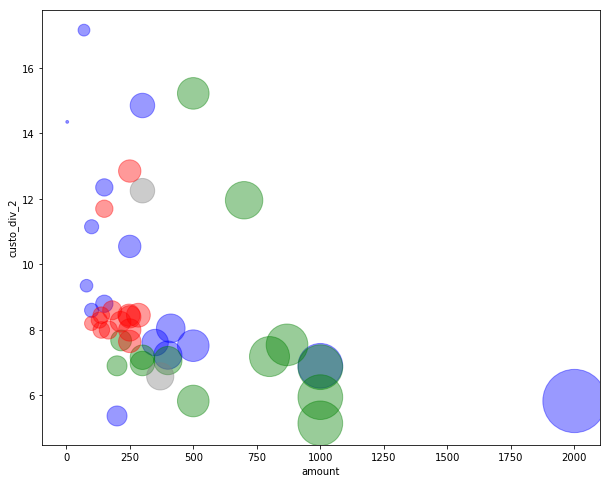

In [243]:
# agora que temos os dados das duas locadoras juntos, vamos tentar plotar o gráfico:
d = {
    'Localiza': 'green',
    'Unidas': 'blue',
    'Movida': 'red'
}

df_locadoras.plot(
    x='amount',
    y='custo_div_2',
    kind='scatter',
    alpha=0.4,
    figsize=(10,8), 
    s= df_locadoras['amount'] *2, 
    c=df_locadoras['adj_name'].apply(lambda x: d.get(x, 'grey'))
)

## Fixing data type

In [ ]:
df['col'] = pd.to_numeric(df['col'])
df['col2'] = pd.to_datetime(df['col2'], format='%d/%m/%Y')
df['col3'] = pd.to_numeric(df['col3'].str.replace('.', '').str.replace(',', '.'))
df['col3'] = pd.to_numeric(df['col3'].str.extract('(\d+)'))

In [245]:
cdi.to_pickle('cdi.pkl')

In [1]:
print("Completed Analysis")

Completed Analysis
